In [18]:
import numpy as np
from sklearn.manifold import TSNE as tsne
import os.path as osp
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
test_fold = 1
exp_id    = "multi-views-expr-4"
# exp_id  = "nas-model-1-angle-expr-4"

(4, 107, 8)


In [40]:
def read_test_data(exp_id, fold):
    teidlst = []
    with open(osp.join("../subsets", "subset{}.txt".format(str(test_fold)))) as fo:
        teidlst += [i.strip() for i in fo.readlines()]
    gts = []
    nod_ids = []
    df = pd.read_csv('../data/annotationdetclsconvfnl_v3.csv',
                            names=['seriesuid', 'coordX', 'coordY', 'coordZ', 'diameter_mm', 'malignant'])
    for sid, gt in zip(df['seriesuid'].tolist()[1:], df['malignant'].tolist()[1:]):
        if sid.split('-')[0] in teidlst:
            gts.append(int(gt))
    gts = np.array(gts)
    feats = np.load("../log/infer-%s/deep-feat-%d.npy" %(exp_id, test_fold))
    return gts, feats
gts, feats = read_test_data("multi-views-expr-4", 1)
def plot_tsne(ax, gts, feat_vect):
    deep_embed = tsne(n_components=2).fit_transform(feat_vect)
    ax.scatter(deep_embed[gts==1,0], deep_embed[gts==1,1], label = "malignant")
    ax.scatter(deep_embed[gts==0,0], deep_embed[gts==0,1], label = "benign")
    ax.legend(loc="best")

In [44]:
feats_multi_views.shape

(428, 8)

In [47]:
np.hstack([gts,]*4).shape

(428,)

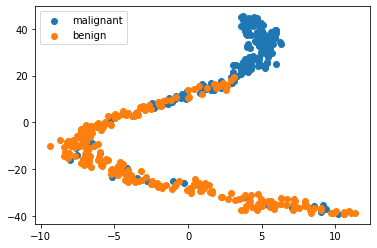

In [48]:
plt.figure()
feats_multi_views = feats.reshape(-1,8)
plot_tsne(plt.gca(), np.hstack([gts,]*4), feats_multi_views)

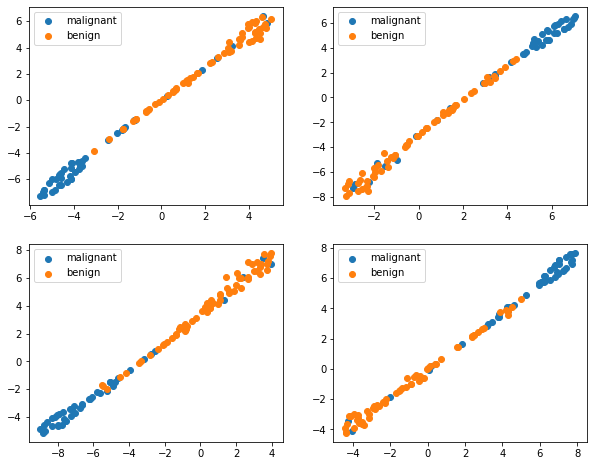

In [33]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize=(10,8))
for i in range(2):
    for j in range(2):
        plot_tsne(axs[i][j], feats[i+j*2,...])

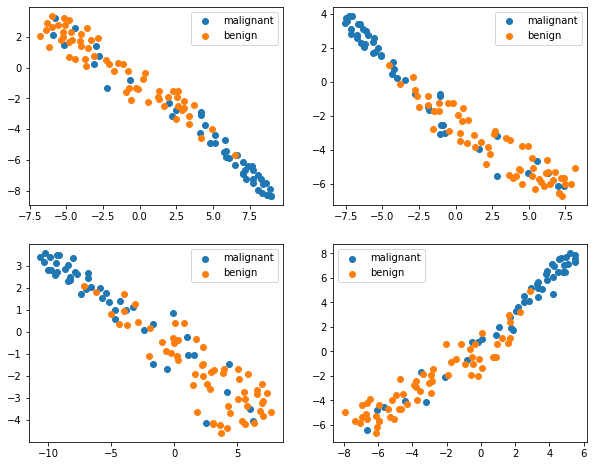

In [39]:
gts, feats = read_test_data("nas-model-1-angle-expr-4", 1)
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize=(10,8))
for i in range(2):
    for j in range(2):
        plot_tsne(axs[i][j], gts, feats[i+j*2,...])

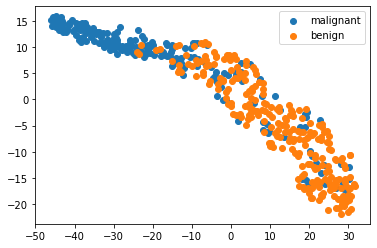

In [49]:
gts, feats = read_test_data("nas-model-1-angle-expr-4", 1)
plt.figure()
feats_multi_views = feats.reshape(-1,8)
plot_tsne(plt.gca(), np.hstack([gts,]*4), feats_multi_views)